In [3]:
import numpy as np
from scipy.fftpack import dctn,idctn
from PIL import Image
import math
import matplotlib.pyplot as plt
import io


### Goal: Sparsity of images in DCT domain

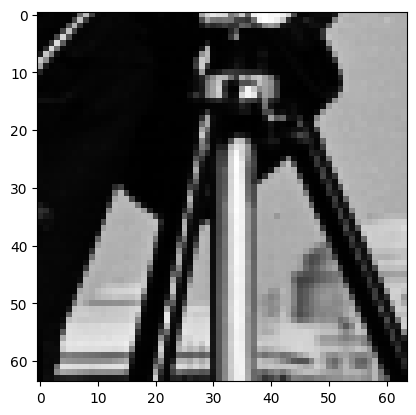

In [4]:
#path = 'Set11/house.tif'
#'cameraman.tif'
clean_img =  Image.open('cameraman.tif')
clean_image_np = np.array(clean_img)/255

n_p = 64 
u = 100
patch = clean_image_np[u:u+n_p,u:u+n_p]
plt.imshow(patch,cmap='gray')

In [5]:


def compute_dct_patch(patch):
    patch_normalized = 2*(patch-0.5)
    dct_coefficients = dctn(patch_normalized, norm='ortho')
    return dct_coefficients

def compute_idct(dct_coefficients):
    patch = idctn(dct_coefficients, norm='ortho')/2+0.5
    return patch

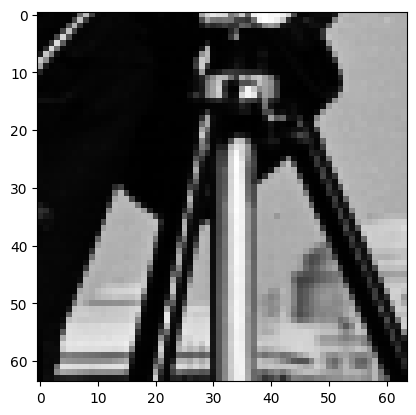

In [6]:
# Example usage
dct_result = compute_dct_patch(patch)
patch_hat = compute_idct(dct_result)
plt.imshow(patch_hat,cmap='gray')

Number of zeros =  0  out of  4096  pixels
PSNR =  317.8546185134584


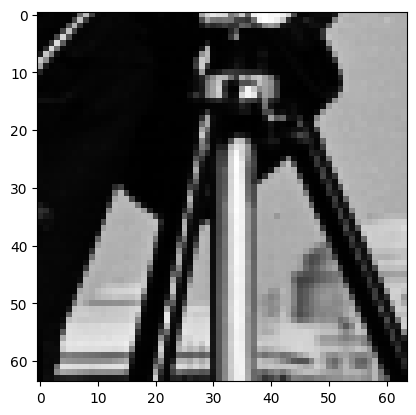

Number of zeros =  2205  out of  4096  pixels
PSNR =  34.61256488446574


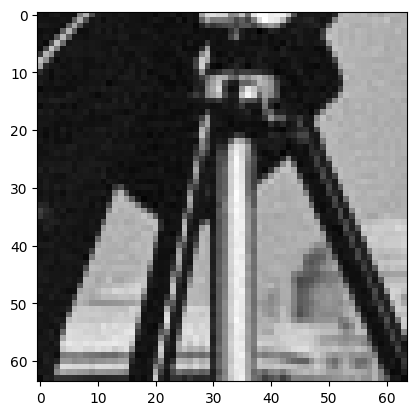

Number of zeros =  3952  out of  4096  pixels
PSNR =  18.82534342156164


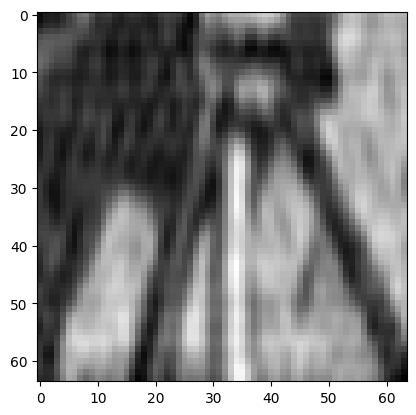

In [9]:
# Set Threshold
T_vec = np.array([0,0.1,1])
for T in T_vec:
    dct_result = compute_dct_patch(patch)
    print('Number of zeros = ',len(np.where(np.abs(dct_result.reshape([n_p**2,]))<T)[0]),' out of ',n_p**2,' pixels')
    dct_result = compute_dct_patch(patch)
    dct_result_quantized = dct_result
    dct_result_quantized[np.where(np.abs(dct_result)<T)] = 0
    patch_hat = compute_idct(dct_result_quantized)
    print('PSNR = ', 10*np.log10(n_p**2/np.linalg.norm(patch-patch_hat)**2))
    plt.imshow(patch_hat,cmap='gray')
    plt.show()

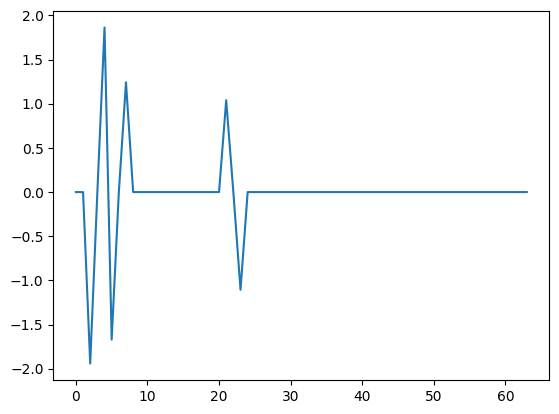

In [10]:
# Example usage
plt.plot((dct_result[10,:]))


Things to explore:

1) Does the performance depend on image?
   Yes, performance does depend on the image. The characteristics of the image itself can affect how DCT compresses or denoises an image. So, separating the zeros from the lower frequency values would be harder if the image had lower frequencies. Another example would be if the image had fewer patterns and more uniform regions, as it would be easier to differentiate the noise from the image. 
   
3) How is PSNR computed?
    According to the code above, PSNR is computed by multiplying 10 by the log of the maximum possible pixel value squared over the sum of the squared differences between the original patch and the reconstructed patch. 
   
5) Can we use this method for denoising?
       This method can be used when the noise and the contents of the image are vastly different in frequencies. If the noise is of a higher frequency, then it would be easier to remove it, as you can set the threshold accordingly. If the frequency of the noise is similar to that of the contents of the image, then it would be a lot harder to denoise using this method. 


y(noisy image) =x (clean image) +z (noise) 
np.random.normal
y -> (DCT) Y --> Threshold Y (keep coeff larger than T) --> (DCT) xhat compute pSNR for different values of T select the ones that gives best performance
(20 to 30 good PSNR) get the difference between xhat and x to see the difference. np.arrange